# Crime and Policing Expenditures Exploratory Questions

<span style="color: #008080">*Barbara Flores*</span>

In this exercise we'll be examining the relationship between crime and policing expenditures using county-level data from Massachusetts. In particular, we're hoping to answer the question "Is there a substantial relationship between crime and policing expenditures?"

## Exercises

### Exercise 1

Begin by downloading the data for this exercise from https://github.com/nickeubank/MIDS_Data/blob/master/descriptive_exercise/crime_expend_MA.csv (just go to `github.com/nickeubank/MIDS_Data`, then go to `descriptive_exercise` and get `crime_expend_MA.csv` if you don't want to type all that).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/descriptive_exercise/crime_expend_MA.csv"
crime_expend_MA = pd.read_csv(path)
crime_expend_MA.head(5)

,months,county_code,crimeindex,policeexpenditures,month,year
0,0,1,61.411101,32.331110,1,1990
1,0,10,92.779361,59.342067,1,1990
2,0,11,93.222701,50.481508,1,1990
3,0,12,95.588374,65.815540,1,1990
4,0,13,92.472719,38.337757,1,1990


### Exercise 2

This data includes monthly data on both each county's policing expenditures (`policeexpenditures` as share of county budget) and an index of crime (`crimeindex`, scaled 0-100) from 1990 to late 2001. 

In these exercises, we'll be focusing on just two counties -- `county_code` 4 and 10. 

First, for each of these two counties, calculate the mean expenditure level and mean crimeindex score (i.e. calculate both means separately for each county). 

Just to make sure we're practicing applied skills—use a loop to calculate your means and print your results nicely! So you should get output like this (though obviously with different numbers—I'm not gonna give you the answer!):

```
for county 4, average policing expenditure is 23.7 and average crime index is 75.83
for county 10, average policing expenditure is 62.15 and average crime index is 55.88
```

In [3]:
counties = [4, 10]

for county in counties:
    policeexpenditures_mean = crime_expend_MA[crime_expend_MA["county_code"] == county][
        "policeexpenditures"
    ].mean()
    pcrimeindex_mean = crime_expend_MA[crime_expend_MA["county_code"] == county][
        "crimeindex"
    ].mean()

    print(
        f"for county {county}, average policing expenditure is {policeexpenditures_mean:.2f} and average crime index is {pcrimeindex_mean:.2f}"
    )

for county 4, average policing expenditure is 54.26 and average crime index is 47.83
for county 10, average policing expenditure is 54.24 and average crime index is 47.77


### Exercise 3

Now calculate the standard deviation of both expenditures and crime for these two counties.

In [4]:
for county in counties:
    policeexpenditures_std = crime_expend_MA[crime_expend_MA["county_code"] == county][
        "policeexpenditures"
    ].std()
    pcrimeindex_std = crime_expend_MA[crime_expend_MA["county_code"] == county][
        "crimeindex"
    ].std()

    print(
        f"for county {county}, the standard deviation of policing expenditure is {policeexpenditures_std:.2f}"
        f" and the standard deviation of crime index is {pcrimeindex_std:.2f}"
    )

for county 4, the standard deviation of policing expenditure is 16.77 and the standard deviation of crime index is 26.94
for county 10, the standard deviation of policing expenditure is 16.68 and the standard deviation of crime index is 27.00


### Exercise 4

Now calculate the correlation between `policeexpenditures` and `crimeindex` for both of these counties (again, output the correlations with nicely formatted and labelled statements!)

In [5]:
for county in counties:
    policeexpenditures_county = crime_expend_MA[
        crime_expend_MA["county_code"] == county
    ]["policeexpenditures"]
    crimeindex_county = crime_expend_MA[crime_expend_MA["county_code"] == county][
        "crimeindex"
    ]

    correlation = policeexpenditures_county.corr(crimeindex_county)

    print(
        f"For County {county}, the correlation between policing expenditure and crime index is: {correlation:.2f}"
    )

For County 4, the correlation between policing expenditure and crime index is: -0.06
For County 10, the correlation between policing expenditure and crime index is: -0.06


### Exercise 5

Based on your results up to this point, what would you guess about whether policing reduces crime? (I know -- this is just a descriptive statistics, and correlation does not imply causality. But what would you infer if this was all you knew?

><span style="color: #008080">Based on the results obtained so far, and considering that we have a negative correlation, we can infer that higher policing expenditure is associated with a lower crime index. Although correlation does not imply causality, we could hypothesize that indeed, policing might reduce crime.</span>

### Exercise 6

Given what you've seen up till now, would you infer that county 4 and county 10 have a similar relationship between crime and police expenditures?

><span style="color: #008080">Considering that the statistics previously calculated, such as the mean, standard deviation, and correlation between the variables under study, are similar between counties 4 and 10, we could assume that the relationship between crime and police expenditures is similar in both.</span>
>
><span style="color: #008080">However, it is important to consider that there may be more different relationships between these variables, as we saw in PDS.</span>

### Exercise 7

Now plot histograms of `policeexpenditures` for both county 4 and county 10. Do the results change you impression of the similarity of county 4 and county 10?

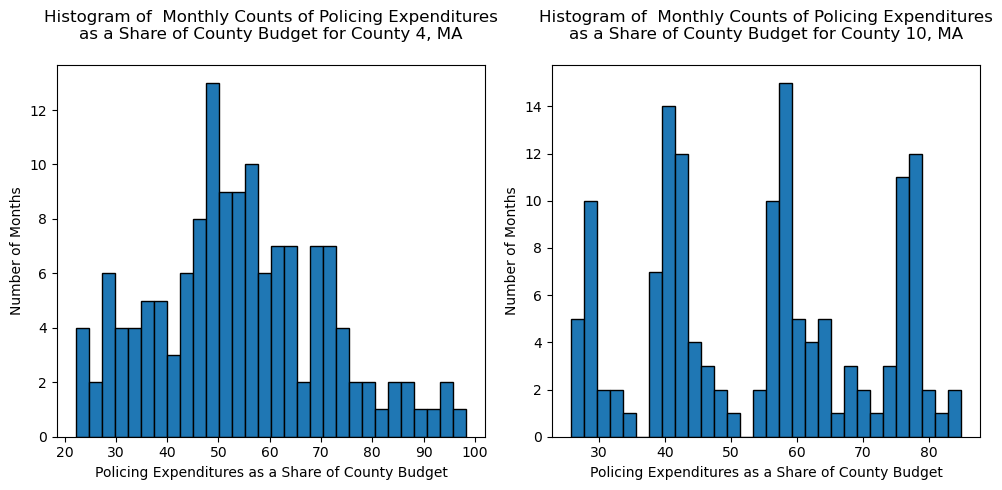

In [6]:
x_4 = crime_expend_MA[crime_expend_MA["county_code"]
                      == 4]["policeexpenditures"]

x_10 = crime_expend_MA[crime_expend_MA["county_code"]
                       == 10]["policeexpenditures"]


fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].hist(x_4, bins=30, edgecolor="black")
axs[0].set_xlabel("Policing Expenditures as a Share of County Budget")
axs[0].set_ylabel("Number of Months")
axs[0].set_title(
    "Histogram of  Monthly Counts of Policing Expenditures\n"
    "as a Share of County Budget for County 4, MA\n"
)

axs[1].hist(x_10, bins=30, edgecolor="black")
axs[1].set_xlabel("Policing Expenditures as a Share of County Budget")
axs[1].set_ylabel("Number of Months")
axs[1].set_title(
    "Histogram of  Monthly Counts of Policing Expenditures\n"
    "as a Share of County Budget for County 10, MA\n"
)


plt.tight_layout()

plt.show()

><span style="color: #008080">After observing the histograms of police expenditures for counties 4 and 10, we can see that they ultimately have different distributions.</span>

### Exercise 8

Finally, create a scatter plot of the relationship between crime and police expenditures for each county (e.g. crime on one axis, police expenditures on the other). Does this change your sense of how similar these are?

In [7]:
import altair as alt


unique_county_codes = sorted(crime_expend_MA["county_code"].unique())

for county_code in unique_county_codes:
    crime_expend_county = crime_expend_MA[crime_expend_MA["county_code"] == county_code]

    chart = (
        alt.Chart(crime_expend_county)
        .mark_circle()
        .encode(
            x="policeexpenditures",
            y="crimeindex",
            tooltip=["policeexpenditures", "crimeindex"],
        )
        .properties(
            title=f"Crime vs Policing Expenditures as a Share of County Budget for County {county_code}"
        )
    )

    chart.display()

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

><span style="color: #008080">After visualizing the scatter plots between the two variables of interest, we can see that despite the mean, standard deviation, and correlation between the variables being similar across different counties, the relationship between the variables turned out to be quite different.</span>
>
><span style="color: #008080">AThis emphasizes the importance of not relying solely on descriptive statistics to understand the relationship between our variables, as they may conceal a lot of information. Data visualization proves to be a crucial tool in this context, especially when dealing with a larger number of variables</span>

## After you have answered...

Read this [discussion page](discussion_exploratory.ipynb).